In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Credit = pd.read_csv("C:/Users/arab/Downloads/Credit.csv")
Credit['Balance_bin'] = pd.cut(Credit.Balance, bins=[-1,460,2000],labels=['0','1'])
Credit = Credit.drop(['ID', 'Balance', 'Limit', 'Rating'], axis=1)
print('Dimension of the data: ' + str(Credit.shape))
Credit.head()

Dimension of the data: (400, 9)


,Income,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance_bin
0,14.891,2,34,11,Male,No,Yes,Caucasian,0
1,106.025,3,82,15,Female,Yes,Yes,Asian,1
2,104.593,4,71,11,Male,No,No,Asian,1
3,148.924,3,36,11,Female,No,No,Asian,1
4,55.882,2,68,16,Male,No,Yes,Caucasian,0


Classification: Fit a KNN with Balance_bin as response:

In [4]:
# data: dropping the credit-card related features (Limit & Rating) to make the classification problem more challenging
X = pd.get_dummies(Credit.drop(['Balance_bin'], axis=1))
y = Credit['Balance_bin']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tune KNN
knn = KNeighborsClassifier()
k_range = list(range(1, 21))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)

# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

print(grid_search.best_params_)
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid_search.best_score_ *100))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'n_neighbors': 10}
Accuracy for our training dataset with tuning is : 63.12%


ACCURACY:  [0.496875 0.571875 0.56875  0.596875 0.603125 0.615625 0.59375  0.615625
 0.6      0.63125  0.60625  0.61875  0.59375  0.6125   0.625    0.61875
 0.609375 0.625    0.621875 0.61875 ]
ACCURACY SE:  [0.09212127 0.096875   0.06373774 0.08082823 0.07532482 0.08733243
 0.07654655 0.08620696 0.08125    0.07368641 0.08523864 0.08003905
 0.09375    0.07551904 0.08267973 0.07756046 0.078125   0.07905694
 0.07711852 0.075     ]


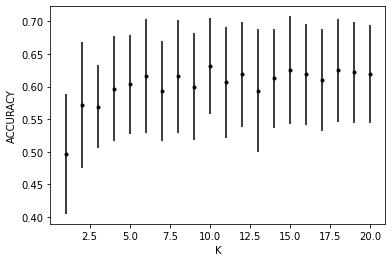

In [5]:
print('ACCURACY: ', grid_search.cv_results_['mean_test_score'])
print('ACCURACY SE: ', grid_search.cv_results_['std_test_score'])

fig, ax = plt.subplots()
ax.errorbar(k_range, grid_search.cv_results_['mean_test_score'], yerr=grid_search.cv_results_['std_test_score'], fmt='.k')
plt.xlabel("K")
plt.ylabel("ACCURACY")
plt.show()
     

In [6]:
knn = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors']).fit(x_train, y_train)

y_test_pred = knn.predict(x_test) 
test_accuracy=accuracy_score(y_test, y_test_pred)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 57.50%


In [7]:
print(confusion_matrix(y_test, y_test_pred, normalize='true'))

[[0.69444444 0.30555556]
 [0.52272727 0.47727273]]
